# Supervised Machine Learning

<img style="padding-right:10px;" src="figures_wk5/supervised_unsupervised.png"><br>

## Supervised and  Unsupervised Machine Learning 

<img align="right" style="padding-right:10px;" src="figures_wk5/type_of_learning.png" width=450><br>
Within the field of machine learning, there are two main types of tasks: **supervised** and **unsupervised**.

The main difference between the two types is that supervised learning is done using a ground truth, or in other words, we have prior knowledge of what the output values for our samples should be. Therefore, the goal of supervised learning is to learn a function that, given a sample of data and desired outputs, best approximates the relationship between input and output observable in the data. Unsupervised learning, on the other hand, does not have labeled outputs, so its goal is to infer the natural structure present within a set of data points.

We also have to take into consideration how our data is represented within our datset in determining where to perform supervised or unsupervised learning

### Supervised Machine Learning

Supervised learning is typically done in the context of a classification or a regression.<br>
* **Classification:** when we want to map input to output labels
* **Regression:** when we want to map input to a continuous output. 

In both regression and classification, the goal is to find specific relationships or structure in the input data that allow us to effectively produce correct output data. That “correct” output is determined entirely from the training data, so while we do have a ground truth that our model will assume is true, it is not to say that data labels are always correct in real-world situations. Noisy, or incorrect, data labels will clearly reduce the effectiveness of your model.

Common algorithms in supervised learning include logistic regression, naive bayes, support vector machines, artificial neural networks, and random forests.

<img align="center" style="padding-right:10px;" src="figures_wk5/supervised.png" width=500> <br>

## Supervised ML: K-nearest Neighbors (KNN)

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks. 

KNN is a lazy learning algorithm since it doesn't have a specialized training phase. Rather, it uses all of the data for training while classifying a new data point or instance. 

KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption e.g. linear-separability, uniform distribution, etc.

### A Bit of Theory

The theory behind the KNN algorithm is one of the simplest  supervised machine learning algorithms. 

KNN simply calculates the distance of a new data point to all other training data points. This distance can be calculated by a variety of methods. The most common are Euclidean, Manhattan, and Minowski. 

KNN then selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong.

Let's see this algorithm in action with the help of a simple example. Suppose you have a dataset with two variables, which when plotted, looks like the one in the following figure.<br>
<img style="padding-right:10px;" src="figures_wk5/theory1.png" width=400><br>

Your task is to classify a new data point with 'X' into "Blue" class or "Red" class. The coordinate values of the data point are x=45 and y=50. 

Suppose the value of K is 3. The KNN algorithm starts by calculating the distance of point X from all the points. It then finds the 3 nearest points with least distance to point X. This is shown in the figure below. The three nearest points have been encircled.<br>
<img align="center" style="padding-right:10px;" src="figures_wk5/theory2.png" width=400><br>

The final step of the KNN algorithm is to assign new point to the class to which majority of the three nearest points belong. 

From the figure above we can see that the two of the three nearest points belong to the class "Red" while one belongs to the class "Blue". Therefore the new data point will be classified as "Red".

### KNN: Regressor vs Classifier

What's the difference between a KNN Regressor and KNN Classifier?
* **KNN regression** tries to predict the value of the output variable by using a local average. The regressor model works best when the codomain is continuous. 
* **KNN classification** attempts to predict the class to which the output variable belong by computing the local probability. The classifier model works best when the codomain is discrete.

As an example, if you were trying to predict the time it took for a pizza delivery company to delivery a pizza, you would be working with a codomain (your target value) that is continuous. 

<div class="alert alert-block alert-warning">
<b>Important Note::</b> Like many other machine learning algorithms, KNN only works with all numerical data. If your dataset has categorical values, you will need to convert them into numeric representations.<br>

Here are some resources on how to do this:<br>
https://www.geeksforgeeks.org/replacing-strings-with-numbers-in-python-for-data-analysis/ <br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html   
</div>

# KNN Regression Demo - Auto dataset

For this demonstration, we will be using a data set that I have already cleaned up (replaced all the NaN). Normally that would be your first step in building a machine learning algorithm.

In [1]:
# pandas
import pandas as pd

# sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set() 

import warnings
warnings.filterwarnings("ignore")

## Loading our data set

In [2]:
# loading our data set
auto = pd.read_csv('data_wk5/auto.dt.nona.csv')

In [3]:
auto.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
5,15.0,8,429.0,198.0,4341,10.0,70,1
6,14.0,8,454.0,220.0,4354,9.0,70,1
7,14.0,8,440.0,215.0,4312,8.5,70,1
8,14.0,8,455.0,225.0,4425,10.0,70,1
9,15.0,8,390.0,190.0,3850,8.5,70,1


## EDA - just a little bit

In [4]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model.year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [5]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.127154,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.315134,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### What are you trying to investigate?
At this point we need to define a question that we wish to investigate. I'm going to use a correlation matrix to look for possible realtionships within our data set.

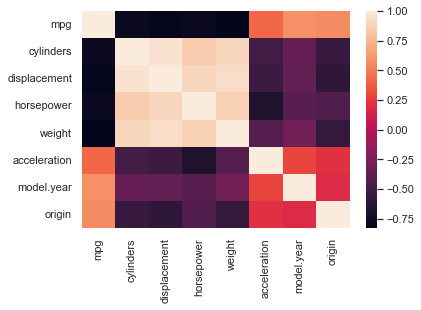

In [6]:
_ = sns.heatmap(auto.corr())

<div class="alert alert-block alert-info">
<b>Pop Quiz::</b> What does the '_' mean in the cell above? <br>

Answer: Signifies a temporary variable that we don't intend to use going forward.
</div>

Looking at the correlation matrix, we can see a strong inverse correlation between mpg and cylinders, displacement, horsepower, and weight. We can also see that acceleration has a strong relationship and model.year and origin appear to have less significance to mpg.

Given this information, I'm going to set mpg as my target variable and remove model.year and origin from the dataset.

In [7]:
# trimming our data set
auto.drop(['model.year', 'origin'],axis=1, inplace=True)

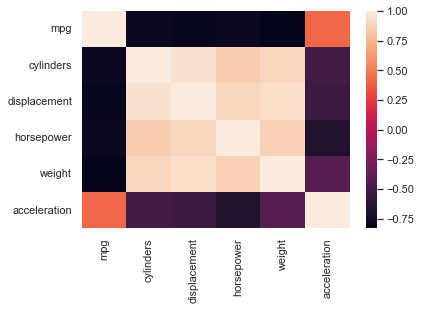

In [8]:
_ = sns.heatmap(auto.corr())

In [10]:
auto.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5
5,15.0,8,429.0,198.0,4341,10.0
6,14.0,8,454.0,220.0,4354,9.0
7,14.0,8,440.0,215.0,4312,8.5
8,14.0,8,455.0,225.0,4425,10.0
9,15.0,8,390.0,190.0,3850,8.5


### Defining our features and targets

* Target(s) are the values that we are trying to predict. <br>
* Features are the columns we are using to predict our target.

In [11]:
auto.shape

(398, 6)

In [12]:
cols = auto.columns
target_col = 'mpg'
feat_cols = [c for c in cols if c != target_col]

# there is nothing magical about the X and y notation here. 
# however, it seems to be a fairly standard notation, so we will use is here
array = auto.values

X = array[:, 1:5]
y = array[:, 0]

In [13]:
y

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 25. ,
       19. , 16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. ,
       13. , 18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. ,
       27. , 26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. ,
       17. , 11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. ,
       22. , 21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. ,
       14. , 15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. ,
       18. , 18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. ,
       22. , 18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. ,
       15. , 24. , 20. , 11. , 20. , 21. , 19. , 15. , 31. , 26. , 32. ,
       25. , 16. , 16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. ,
       26. , 31. , 32. , 28. , 24. , 26. , 24. , 26

### Splitting your data set into training and test sets

Now we are going to create two new dataframes:

* One to train the machine learning model.<br>
* One to test the accuracy of that model. <br>
* **This can be an iterative process.**

We make a training set so we can train all of our models on the same data. We can then compare how the models perform by evaluating accuracy on the test set. Train and tests sets should never contain any of the same data. The idea is the model has never seen the test set before, so we can check if our model is overfitting (high variance) and which model works best on unseen data. Sometimes the test data is called the ‘holdout set’.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div class="alert alert-block alert-info">
<b>Pop Quiz::</b> What does the 'random_state' mean in the cell above do? <br>

Answer: random_state sets a seed to the random generator, so that your train-test splits are always deterministic. Meaning your results will be reproducible if you were to re-run this notebook.
</div>

### Setting up the KNN Regressor

Since our target value (mpg) is continuous, we will use sklearn.KNeighborsRegressor.

For right now, we are simply going to use k=3 for our number of clusters. We will look at a way to evaluate different k values a little further down.

In [15]:
# define and fit our model
model = KNeighborsRegressor(n_neighbors=3, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=3)

In [16]:
# gather the predictations that our model made for our test set
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[33.  28.  19.  13.  14.  27.  24.  13.  17.  21.  15.  38.  26.  15.
 25.  12.  31.  17.  16.  31.  22.  22.  22.  33.5 18.  44.  26.  24.5
 18.1 12.  27.  36.  23.  24.  37.2 16.  21.  19.2 16.  29.  26.8 27.
 18.  10.  23.  36.  26.  25.  25.  25.  22.  34.1 32.4 13.  23.5 14.
 18.5 29.8 28.  19.  11.  33.  23.  21.  23.  25.  23.8 34.4 24.5 13.
 34.7 14.  15.  18.  25.  19.9 17.5 28.  29.  17. ]
Predictions for test data set
[34.4        30.5        23.6        15.         15.33333333 27.03333333
 22.56666667 13.33333333 15.16666667 21.46666667 15.4        35.7
 32.16666667 16.23333333 28.93333333 11.66666667 24.16666667 23.73333333
 14.66666667 35.7        28.36666667 22.63333333 18.33333333 33.9
 18.56666667 34.93333333 24.         25.23333333 22.26666667 11.66666667
 23.83333333 31.86666667 15.66666667 25.06666667 33.6        14.16666667
 28.73333333 17.         13.         30.53333333 26.8        28.43333333
 23.06666667 12.66666667 26.7        27.3333

In [17]:
#compare the two sets for 'subscribed'
differs = y_test - preds
print('Differences between the two sets')
print(differs)

Differences between the two sets
[-1.4        -2.5        -4.6        -2.         -1.33333333 -0.03333333
  1.43333333 -0.33333333  1.83333333 -0.46666667 -0.4         2.3
 -6.16666667 -1.23333333 -3.93333333  0.33333333  6.83333333 -6.73333333
  1.33333333 -4.7        -6.36666667 -0.63333333  3.66666667 -0.4
 -0.56666667  9.06666667  2.         -0.73333333 -4.16666667  0.33333333
  3.16666667  4.13333333  7.33333333 -1.06666667  3.6         1.83333333
 -7.73333333  2.2         3.         -1.53333333  0.         -1.43333333
 -5.06666667 -2.66666667 -3.7         8.66666667 -4.3        -2.
  1.         -8.53333333  1.         -1.6         7.73333333 -0.66666667
 -1.6         1.66666667  3.5         3.1        -1.9        -0.9
 -4.33333333 -1.4        -5.         -6.13333333  1.53333333  2.
  0.8         1.16666667 -4.5        -2.16666667  0.06666667 -1.16666667
  0.5        -7.33333333  2.93333333  0.7        -1.06666667  3.2
 -1.5         0.76666667]


Just printing out the predictions and differences doesn't really work for a larger data set. [skleam.metric](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) is a great package to look at the accuracy of your model. Just make sure you are matching your evaluation metric with the type of algorithm you used.

In [18]:
# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0 and it can be negative 
# (because the model can be arbitrarily worse). 
# A constant model that always predicts the expected value of y, 
# disregarding the input features, would get a R^2 score of 0.0.
from sklearn.metrics import r2_score

print(r2_score(y_test,preds))

0.7532098674876971


In [19]:
# Explained variance regression score function
# Best possible score is 1.0, lower values are worse.

from sklearn.metrics import explained_variance_score

print(explained_variance_score(y_test,preds))

0.756425950774052


Hmmm... A r2_score of .75 isn't all that bad.  Especially since we just guessed on the number of clusters.  Perhaps there is away to be "smarter" about selecting the number of clusters.

### Determining the optimal number of clusters

Let's loop through a range of k values and store the accuracy of the various models.   then we can graphically display the accuracy scores to determine the optimal number of clusters. 

Note: For KNeighborsRegressor, score retrns the r2_score from sklearn.metrics.<br>
(https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

In [20]:
scores = []
print(f'Features: {feat_cols} \nTarget: {target_col}')

# remember the ending number for range is not inclusive
for k in range(2, 20):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Features: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'] 
Target: mpg
Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters


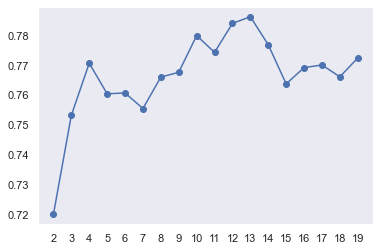

In [21]:
# display the resutls
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.grid()
_ =plt.xticks(range(2, 20))

So what is this plot trying to tell us? <br>

We loaded accuracy scores into the array that this plot is based off of. We can validate this by comparing the r2_score from our work above with the plot itself.  So, we would expect k=3 to be around .75. (red circle)

<img align="center" style="padding-right:10px;" src="figures_wk5/plot1.png" width=400><br>

Yup! we have a match.

The green arrow is showing that at k=13, we have the highest r2_score value.  That would lead us to believe that 13 is the optimal number of clusters for our data set and this algorithm.

Let's re-run the model for k=13 and verify our assumptions.

In [22]:
# define and fit our model
model = KNeighborsRegressor(n_neighbors=13, n_jobs=-1)
model.fit(X_train, y_train)

# gather the predictations that our model made for our test set
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[33.  28.  19.  13.  14.  27.  24.  13.  17.  21.  15.  38.  26.  15.
 25.  12.  31.  17.  16.  31.  22.  22.  22.  33.5 18.  44.  26.  24.5
 18.1 12.  27.  36.  23.  24.  37.2 16.  21.  19.2 16.  29.  26.8 27.
 18.  10.  23.  36.  26.  25.  25.  25.  22.  34.1 32.4 13.  23.5 14.
 18.5 29.8 28.  19.  11.  33.  23.  21.  23.  25.  23.8 34.4 24.5 13.
 34.7 14.  15.  18.  25.  19.9 17.5 28.  29.  17. ]
Predictions for test data set
[34.24615385 26.36923077 26.39230769 15.09230769 15.         31.36923077
 23.41538462 12.53846154 14.69230769 22.45384615 16.20769231 32.56153846
 31.46923077 15.51538462 26.85384615 12.61538462 27.06153846 21.56923077
 14.96153846 33.77692308 27.54615385 21.53076923 22.30769231 34.16923077
 18.00769231 34.85384615 26.6        24.82307692 19.35384615 12.61538462
 23.61538462 33.66153846 15.13076923 27.41538462 32.39230769 14.26153846
 26.16923077 18.50769231 13.41538462 29.89230769 26.12307692 34.23846154
 24.53846154 12.84615385 27.54

In [23]:
differs = y_test - preds

print(f'Differences between the two sets:\n{differs}\n')

print(f'r2_score: {r2_score(y_test,preds)}')

Differences between the two sets:
[-1.24615385e+00  1.63076923e+00 -7.39230769e+00 -2.09230769e+00
 -1.00000000e+00 -4.36923077e+00  5.84615385e-01  4.61538462e-01
  2.30769231e+00 -1.45384615e+00 -1.20769231e+00  5.43846154e+00
 -5.46923077e+00 -5.15384615e-01 -1.85384615e+00 -6.15384615e-01
  3.93846154e+00 -4.56923077e+00  1.03846154e+00 -2.77692308e+00
 -5.54615385e+00  4.69230769e-01 -3.07692308e-01 -6.69230769e-01
 -7.69230769e-03  9.14615385e+00 -6.00000000e-01 -3.23076923e-01
 -1.25384615e+00 -6.15384615e-01  3.38461538e+00  2.33846154e+00
  7.86923077e+00 -3.41538462e+00  4.80769231e+00  1.73846154e+00
 -5.16923077e+00  6.92307692e-01  2.58461538e+00 -8.92307692e-01
  6.76923077e-01 -7.23846154e+00 -6.53846154e+00 -2.84615385e+00
 -4.54615385e+00  5.14615385e+00 -1.44615385e+00 -2.30769231e+00
 -1.55384615e+00 -3.48461538e+00 -4.60769231e+00  5.15384615e-01
  5.21538462e+00 -9.15384615e-01 -2.69230769e+00  5.84615385e-01
  3.33076923e+00  3.36923077e+00  1.85384615e+00  2.6153

Hooray! That all turned out as expected. The r2_score for our KNNRegresor with k=13 is approximately .79. Which is a fairly descent score overall. 

# Other Regression Algorithms

K Nearest Neighbor isn't the only regression algorithm out there -- not by a long shot!

Let's use our **auto** data set to compare some of the others. "Simple" algorithms we'll test are:

* **Linear**<br>
    * Linear Regression<br>
    * Lasso<br>
    * Elastic Net<br>
* **Non-Linear**<br>
    * KNN (with default k)<br>
    * Decision Tree<br>
    * SVR<br>

Then, we'll try using the `StandardScaler` in a `Pipeline` to see if scaling the data makes a difference. 

Finally, we'll look at some "ensemble" algorithms:

* Ada Boost
* Gradient Boost
* Random Forest
* Extra Trees

## K-Fold Cross-Validation

K-fold cross-validation is a testing technique used to reduce variance. It splits the data set into _k_ parts or _folds_. The algorithm is trained on all but one of the folds, with one being used for testing. After training and testing, you end up with _k_ performance scores that can be summarized with mean and standard deviation.

K-fold cross-validation gives a more accurate estimate of algorithm performance because each algorithm is trained multiple times with different data each time. 

Care must be used in choosing _k_ so that each chunk of training data is large enough to be representative of the problem. In our case, the **autos** data set is small with 398 rows. If we choose `k = 4` then our data sets will only have 10 rows in each one. 

**Other variations exist,** including <br>
* Setting `k =  1` for "Leave one out" testing<br>
* Manually using `train_test_split` multiple times<br>

K-fold cross-validation is the **_gold standard_** with _k_ usually being set to 3, 5 or 10.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot

In [25]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR(gamma='auto')))

In [26]:
# evaluate each model in turn
seed = 42
num_folds = 5
scoring = 'neg_mean_squared_error'

We will use Mean Squared Error (MSE) for our evaluation. 0 is a perfect score. 

In [27]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -19.479747 (1.626687)
LASSO: -19.398853 (1.584432)
EN: -19.392599 (1.592171)
KNN: -19.147918 (1.342934)
CART: -25.255924 (5.426224)
SVR: -63.950302 (11.110260)


Looks like un-tuned KNN actually scored best, the **linear** algorithms.

Let's visualize those results:

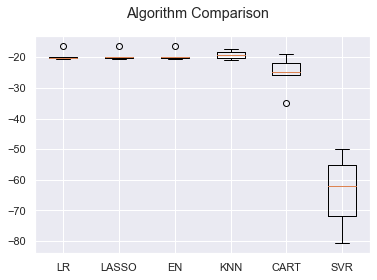

In [28]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

If we throw out the highest two:

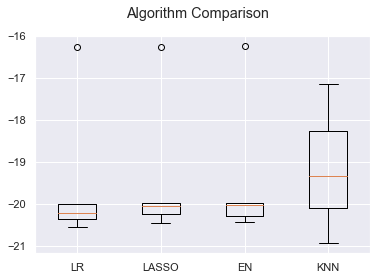

In [29]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results[0:-2])
ax.set_xticklabels(names[0:-2])
pyplot.show()

## Scaling the data

It is possible that the different data scales (tens, hundreds, thousands) are affecting the algorithms' ability to accurately train. 

We will use the `StandardScaler` function to scale the data. `StandardScaler` re-sets the data so each attribute has a mean of 0 and standard deviation of 1.

We will also use a `Pipeline` to insure all of the data is treated the same way for each algorithm.

In [30]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR(gamma='auto'))])))

In [31]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -19.479747 (1.626687)
ScaledLASSO: -20.511060 (3.103859)
ScaledEN: -21.421899 (3.748918)
ScaledKNN: -16.203762 (2.550511)
ScaledCART: -25.828304 (3.522510)
ScaledSVR: -16.907736 (2.172401)


That helped KNN and SVR. Linear Regression stayed the same.

Let's graph it now:

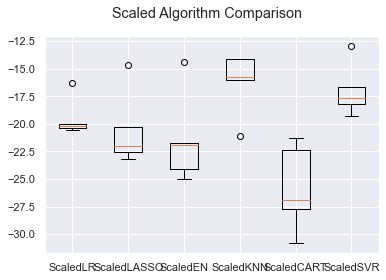

In [32]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Ensemble Methods

Another way to increase performance is to use **Ensemble** algorithms. 

The Ensemble methods use a variety of sampling methods during the learning process so that they look at the data multiple times and in multiple ways. 

* **Boosting Methods**
    * AdaBoost
    * Gradient Boosting
* **Bagging Methods**
    * Random Forests
    * Extra Trees

### Boosting

Boosting takes a weak decision model (like regression or shallow decision trees) and trains a sequence of many of those models, each one compensating for the weakness of the previous model.   

#### AdaBoost

AdaBoost identifies mis-classified data points and adjusting their weight in subsequent model calculations so they are paid more attention.

#### Gradient Boosting

Gradient Boosting focuses on the loss function (error), attempting to minimize it on each subsequent model -- that is the "gradient" part.

### Bagging

"Bagging" is a shortening of **bootstrap aggragating**. This is based off the bootstrap statistical method discussed in Week 2, where many smaller sub-samples of the data are used in calculations and then averaged together. 

**Random Forests** are a group of decision trees, trained on sub-samples of the data. Decision trees are very sensitive to differences in data -- even the same data in a different order can produce a very different decision tree. After training all the smaller decision trees, the results are aggragated into a singular decision model.

Random forests were the king of machine learning competions (like Kaggle) until deep learning came along and became feasible for use by the general populace.

In [33]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor(n_estimators=10))])))

In [34]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -16.760828 (1.603532)
ScaledGBM: -14.202416 (1.613929)
ScaledRF: -15.452118 (2.662335)
ScaledET: -15.400977 (2.481690)


Even un-tuned, the ensemble methods scored better than the algorithms above.

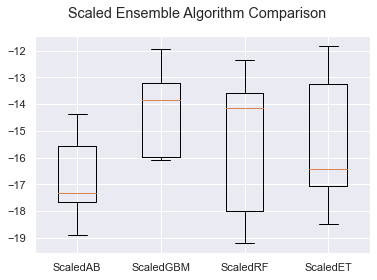

In [35]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# KNN Classifier Demo - Penguins!

**Classification** is the type of Machine Learning we do on categorical targets.

I like penguins, so we are going to use Week 4's Palmer Penguins dataset to look at classification, with **species** as the target.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
penguins = sns.load_dataset('penguins')

In [38]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [39]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In Week 4, we found that there are 2 rows that have essentially no data and 9 rows missing sex entries. At that time, we used a RandomForestClassifier algorithm to guess the missing sex entries. 

For expediency's sake, we will simply drop those 9 rows. 

In [40]:
penguins = penguins[penguins.body_mass_g.notna()]
penguins = penguins[penguins.sex.notna()]
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


## Classifier Demo -- Guessing Species

3 of the dataset's fields are categories that could be used for classification: **Species**, **Island**, and **Sex**. You've already seen a demo of sex classification, so let's focus on species this time.

It is tempting to say that since there are 3 species, K should be 3 **BUT** remember, the K-nearest neighbor algorithm works by comparing a point to its' neighbors, and K is the number of neighbors to use in the comparison. We will still need to discover the best K.

But first, we need to dummy encode our categories. Remember, since **species** is our target, we do not encode it.

In [41]:
peng_encoded = pd.get_dummies(penguins, columns=['island', 'sex'], prefix=['island', 'sex'])
peng_encoded

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,Adelie,39.3,20.6,190.0,3650.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0,1,0,0,1,0
340,Gentoo,46.8,14.3,215.0,4850.0,1,0,0,1,0
341,Gentoo,50.4,15.7,222.0,5750.0,1,0,0,0,1
342,Gentoo,45.2,14.8,212.0,5200.0,1,0,0,1,0


In [42]:
peng_encoded.shape

(333, 10)

In [43]:
array = peng_encoded.values

In [44]:
X = array[:,1:]
y = array[:,0]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's jump right in to finding the K value:

In [46]:
scores = []
# remember the ending number for range is not inclusive
for k in range(2, 20):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters



Max accuracy = 83.5820895522388%


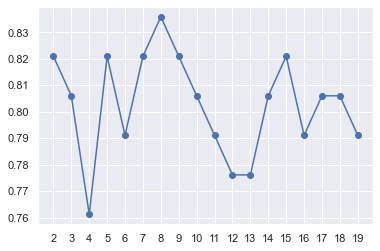

In [47]:
# display the resutls
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
# plt.grid()
plt.xticks(range(2, 20))

print(f'\nMax accuracy = {(max(scores)*100)}%')

Seems our highest accuracy was actually k = 8.

In [48]:
max(scores)

0.835820895522388

## Demo - Comparing Classifiers on the Autos data set

Let's compare classification algorithms, just like we did with regression algorithms, using the **cylinders** column of the auto dataset as our classification target.

* **Linear algorithms**:
    * Logistic regression
    * Linear determinant analysis
* **Non-linear algorithms**:
    * Classification and regression trees
    * Support vector machines
    * Gaussian naive Bayes
    * KNN

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [50]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6
394,44.0,4,97.0,52.0,2130,24.6
395,32.0,4,135.0,84.0,2295,11.6
396,28.0,4,120.0,79.0,2625,18.6


In [51]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration'],
      dtype='object')

Re-order the columns to make it easier to designate the target.

In [52]:
auto = auto[['mpg', 'displacement', 'horsepower', 'weight',
       'acceleration', 'cylinders']]

In [53]:
array = auto.values

In [54]:
X = array[:, 0:5]
y = array[:, 5]

In [55]:
y

array([8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 4., 6., 6.,
       6., 4., 4., 4., 4., 4., 4., 6., 8., 8., 8., 8., 4., 4., 4., 4., 6.,
       6., 6., 6., 6., 8., 8., 8., 8., 8., 8., 8., 6., 4., 6., 6., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 3., 8., 8., 8., 8., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 6., 6., 6., 6., 6.,
       4., 8., 8., 8., 8., 6., 4., 4., 4., 3., 4., 6., 4., 8., 8., 4., 4.,
       4., 4., 8., 4., 6., 8., 6., 6., 6., 6., 4., 4., 4., 4., 6., 6., 6.,
       8., 8., 8., 8., 8., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 6.,
       6., 6., 6., 8., 8., 8., 8., 6., 6., 6., 6., 6., 8., 8., 4., 4., 6.,
       4., 4., 4., 4., 6., 4., 6., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       8., 8., 8., 8., 6., 6., 6., 6., 4., 4., 4., 4., 6., 6., 6., 6., 4.,
       4., 4., 4., 4., 8., 4., 6., 6., 8., 8., 8., 8., 4., 4., 4., 4., 4.,
       8., 8., 8., 8., 6.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [58]:
num_folds = 5
seed = 42
scoring = 'accuracy'

In [59]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.946478 (0.016270)
LDA: 0.946478 (0.016270)
KNN: 0.893155 (0.030267)
CART: 0.955952 (0.015374)
NB: 0.940278 (0.032126)
SVM: 0.515923 (0.054208)


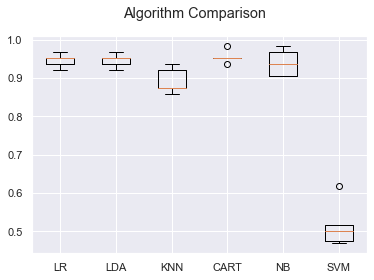

In [60]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### StandardScaler

In [61]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))

In [62]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.927728 (0.015806)
ScaledLDA: 0.946478 (0.016270)
ScaledKNN: 0.937054 (0.020123)
ScaledCART: 0.943452 (0.030530)
ScaledNB: 0.940278 (0.032126)
ScaledSVM: 0.940278 (0.018330)


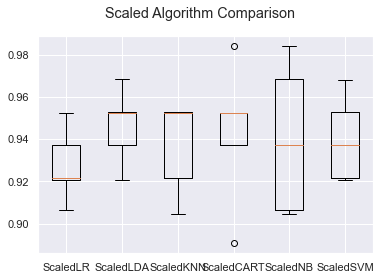

In [63]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Interesting! That vastly improved SVM and helped a couple of the others. 

With scores like this, this dataset *may not* have been a good choice for a demo...

### Ensemble Classification

* **Boosting**: 
    * AdaBoost
    * Gradient Boosting
* **Bagging**:
    * RandomForests
    * Extra Trees

In [64]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))

In [65]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.798512 (0.124638)
GBM: 0.959127 (0.015938)
RF: 0.955952 (0.011910)
ET: 0.959028 (0.025720)


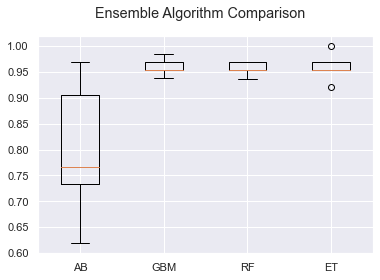

In [66]:
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Lessons Learned

* **Many algorithms exist for a reason**. 
    * Some machine learning algorithms are better than others, depending on the data. 
    * You probably won't know which is best until you try it.
* Data can be *scaled*, and/or *normalized* to "tune" it. 
    * It **might** improve accuracy. 
* ML Algorithms can be "tuned", also.
    * Like KNN's k-value, among others.